<h1>Industry-Safety-Detection-Using-Computer-Vision</h1>

<center>Using Yolo V11 </center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1>Necessary file install</h1>

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 14.7 MB/s eta 0:00:00a 0:00:01


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.31 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import Image

<h1>Data using from roboflow</h1>

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 1.9 MB/s eta 0:00:00a 0:00:01
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-1 in yolov11:: 100%|██████████| 6560/6560 [00:01<00:00, 6092.79it/s]


<h1>File Location </h1>

In [7]:
dataset.location

'/kaggle/working/PPE_Detection-1'

<h1>Training The Model</h1>

In [9]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 63.9MB/s]
New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.31 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/PPE_Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, 

<h1>Confusion Matrix </h1>

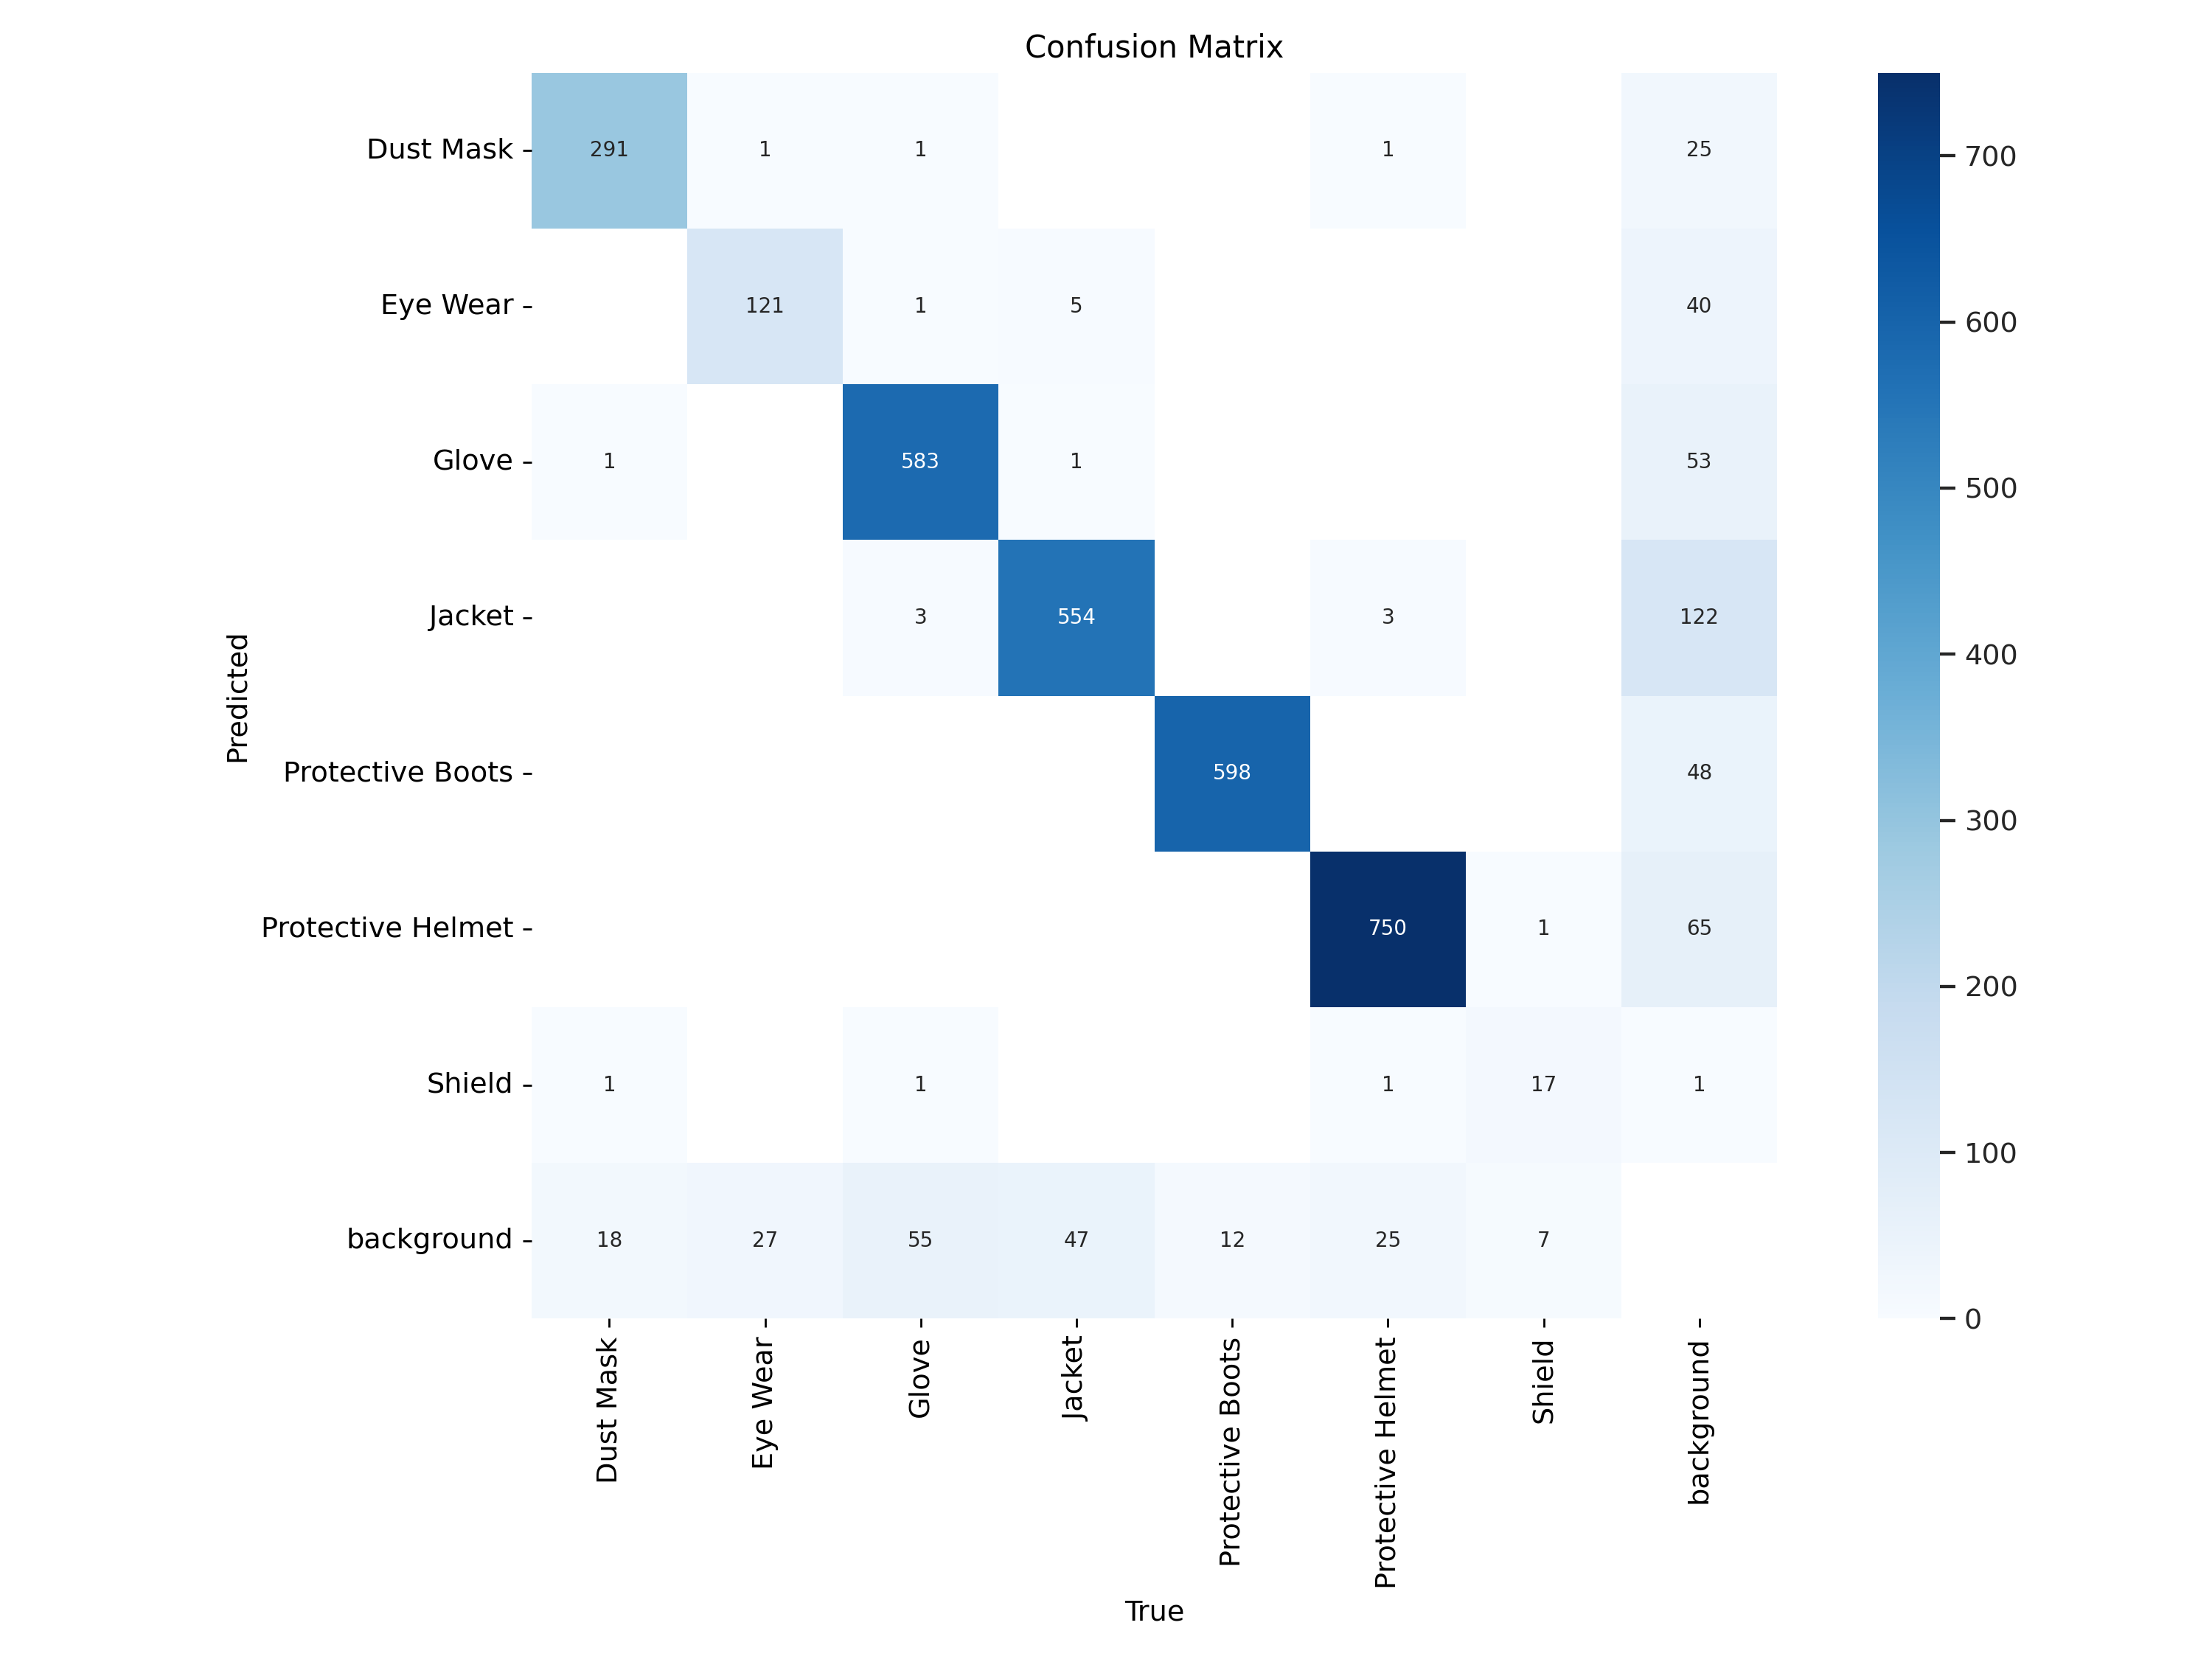

In [11]:
Image("/kaggle/working/runs/detect/train/confusion_matrix.png",width=400, height=400)

<h1>F1_Curve</h1>

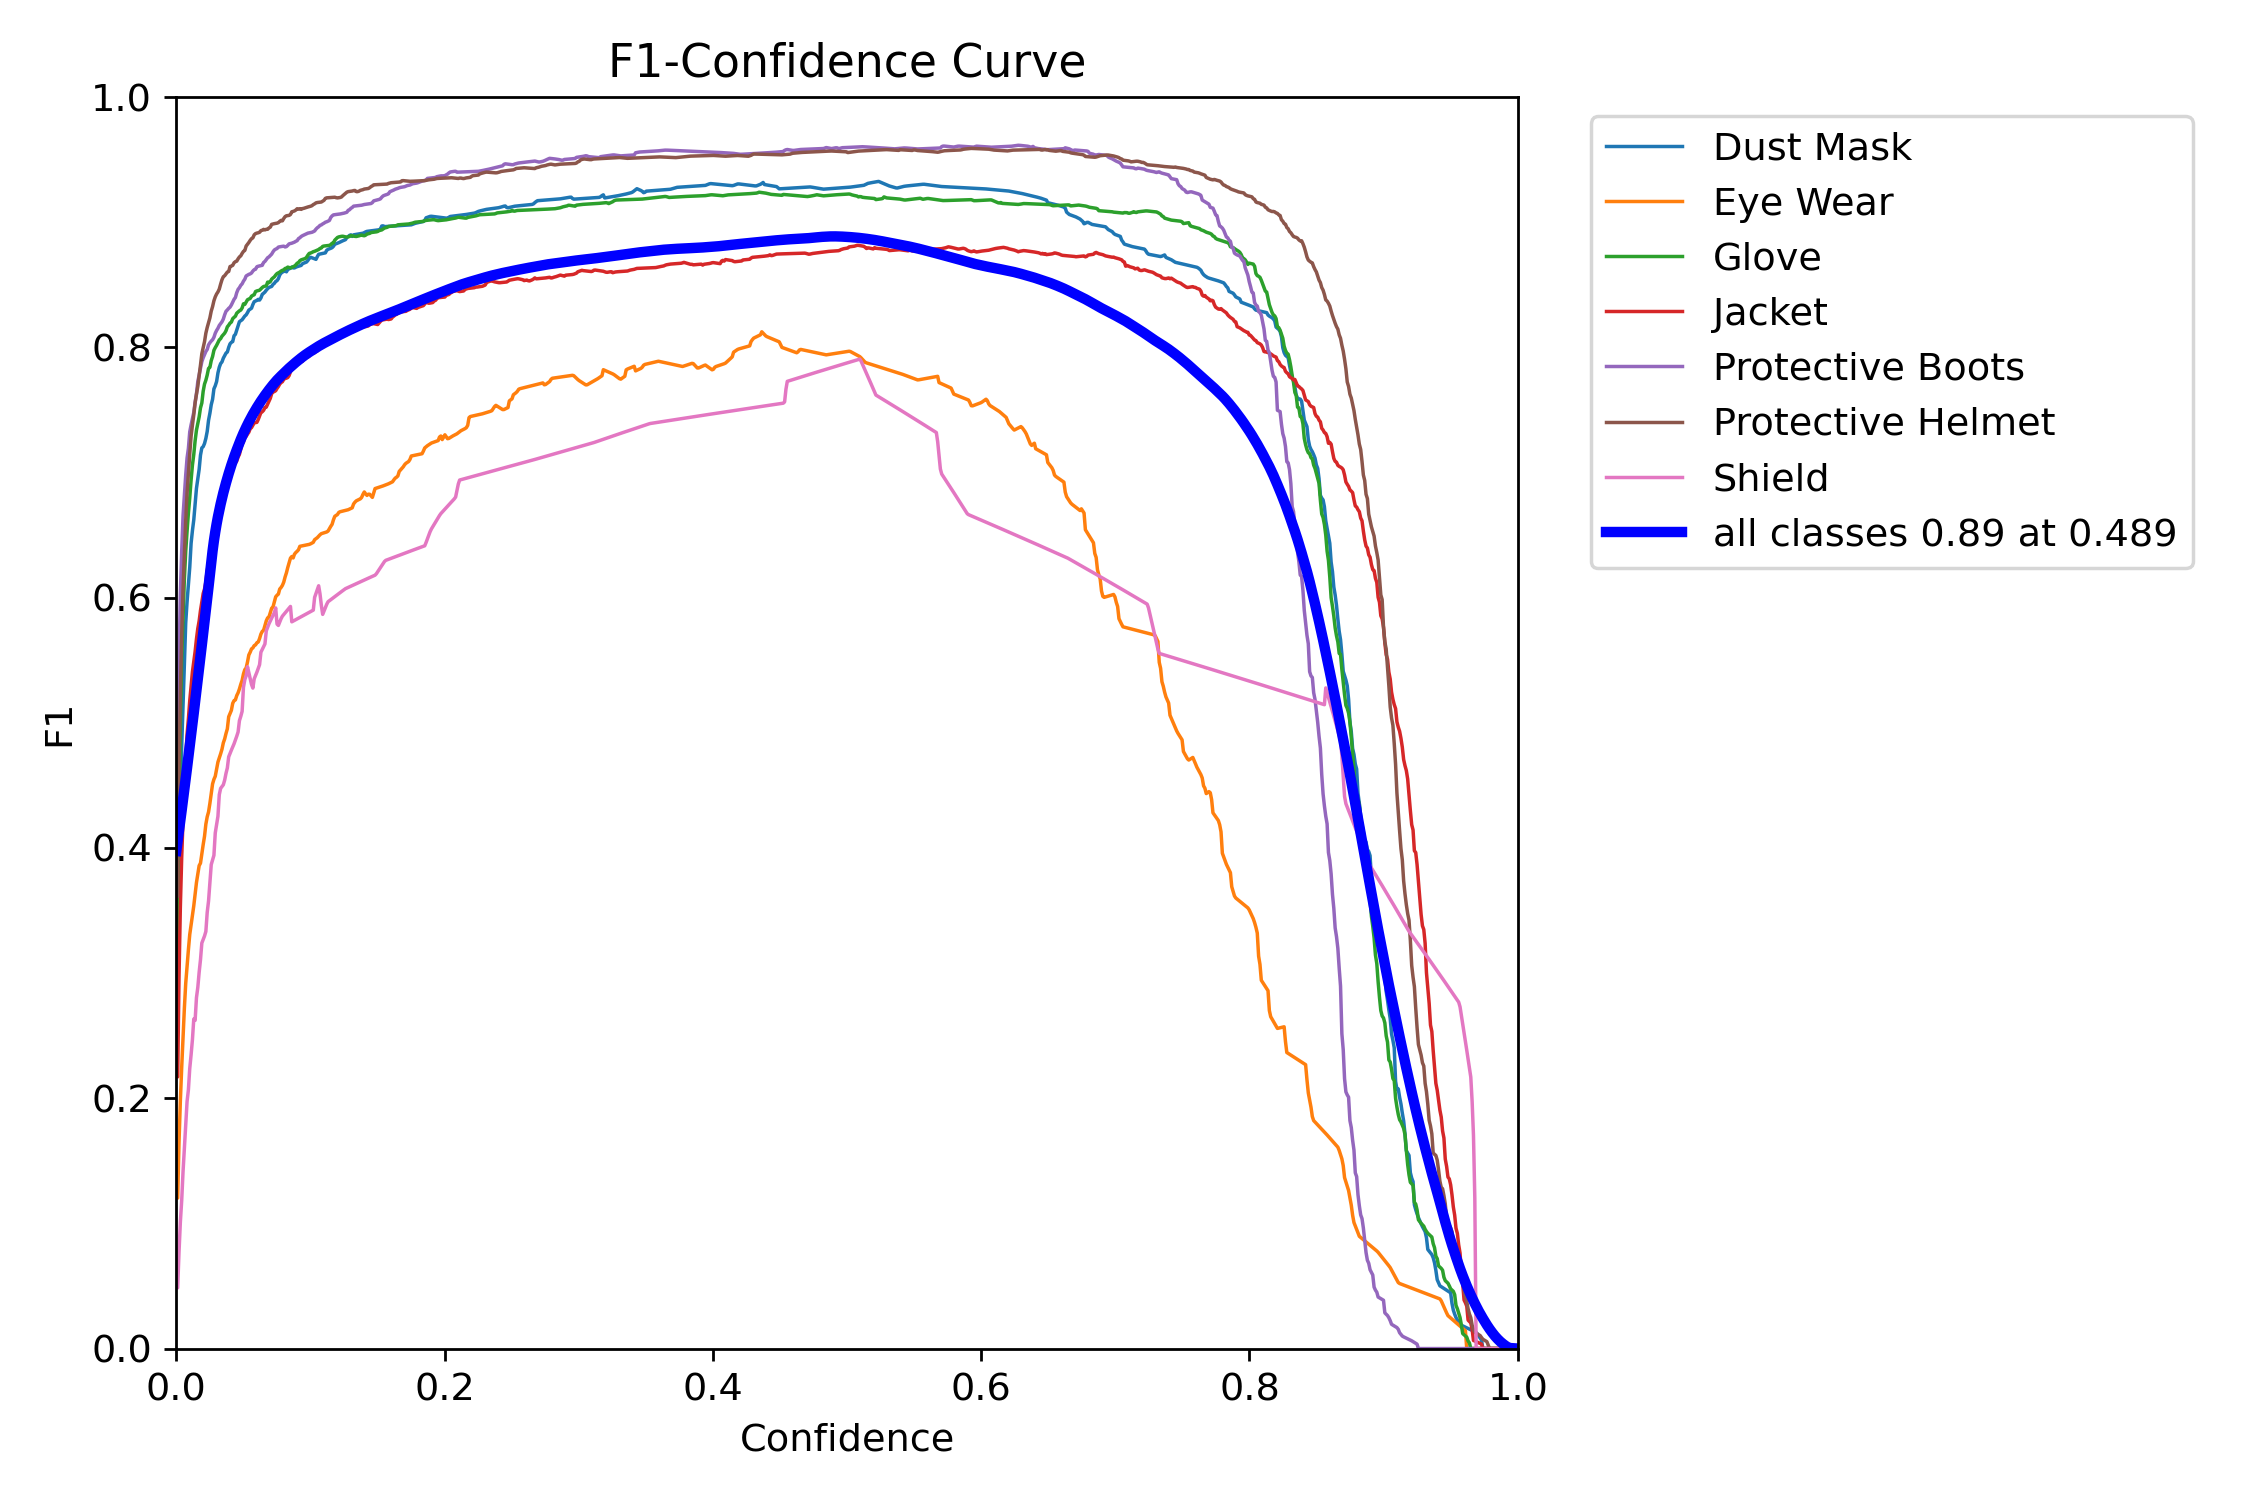

In [23]:
Image("/kaggle/working/runs/detect/train/F1_curve.png", width=600)

<h1>R_curve</h1>

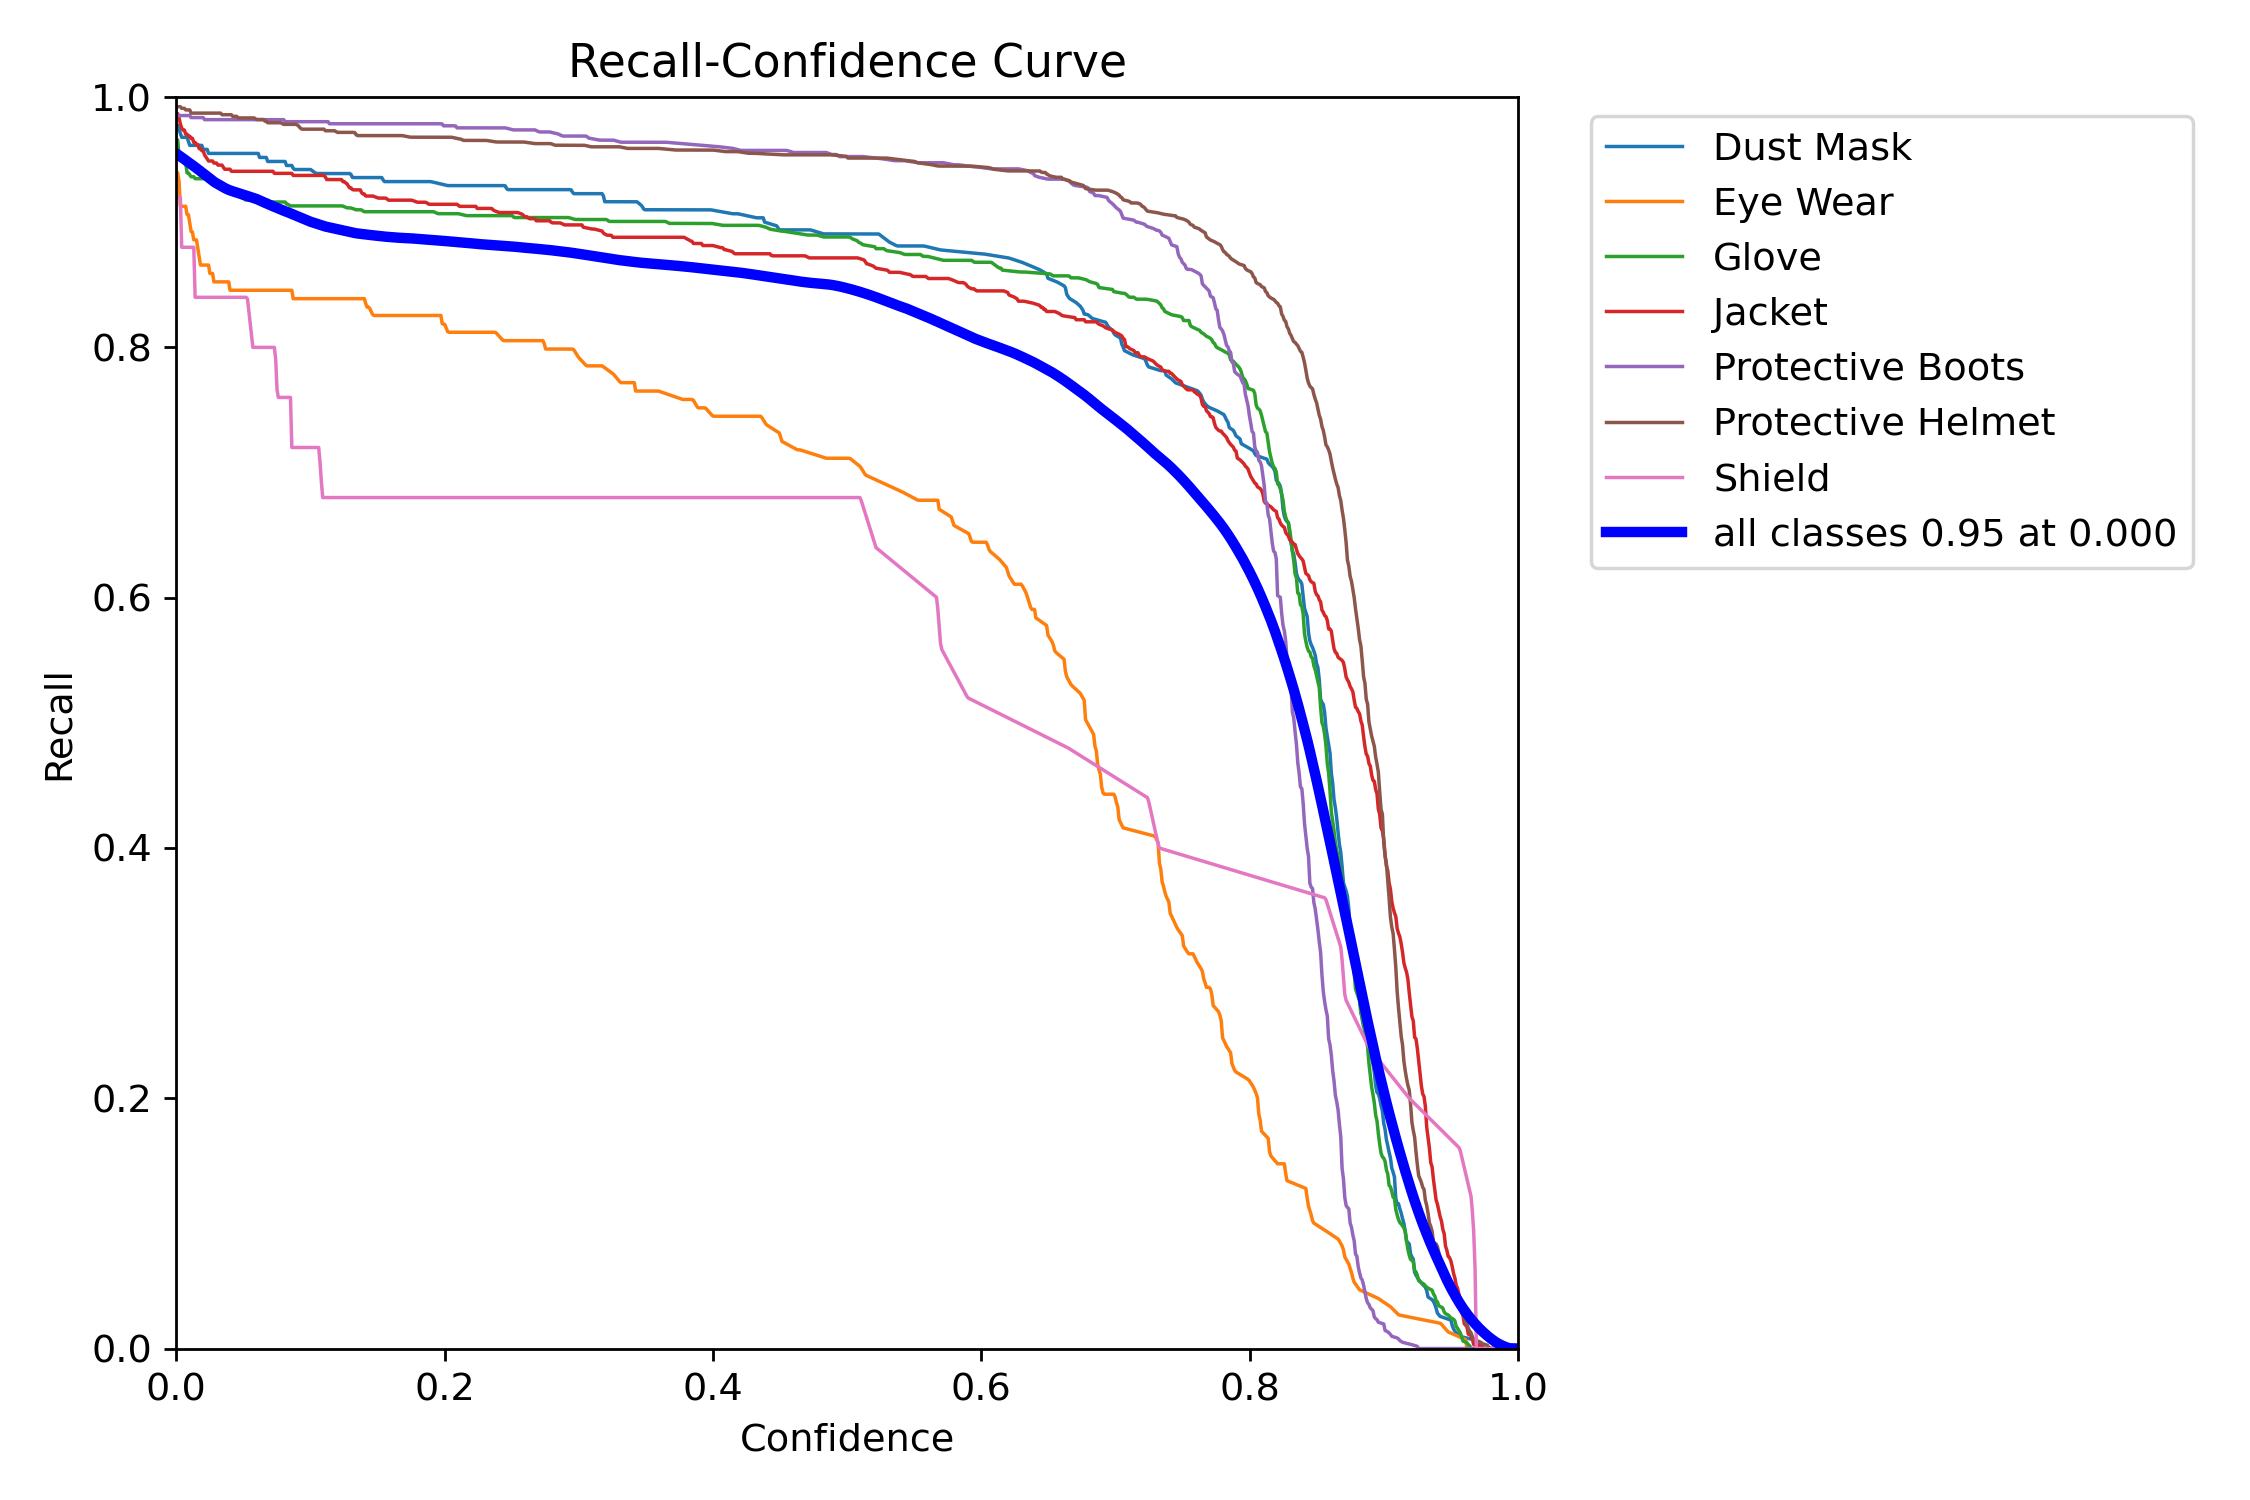

In [24]:
Image("/kaggle/working/runs/detect/train/R_curve.png",width=600)

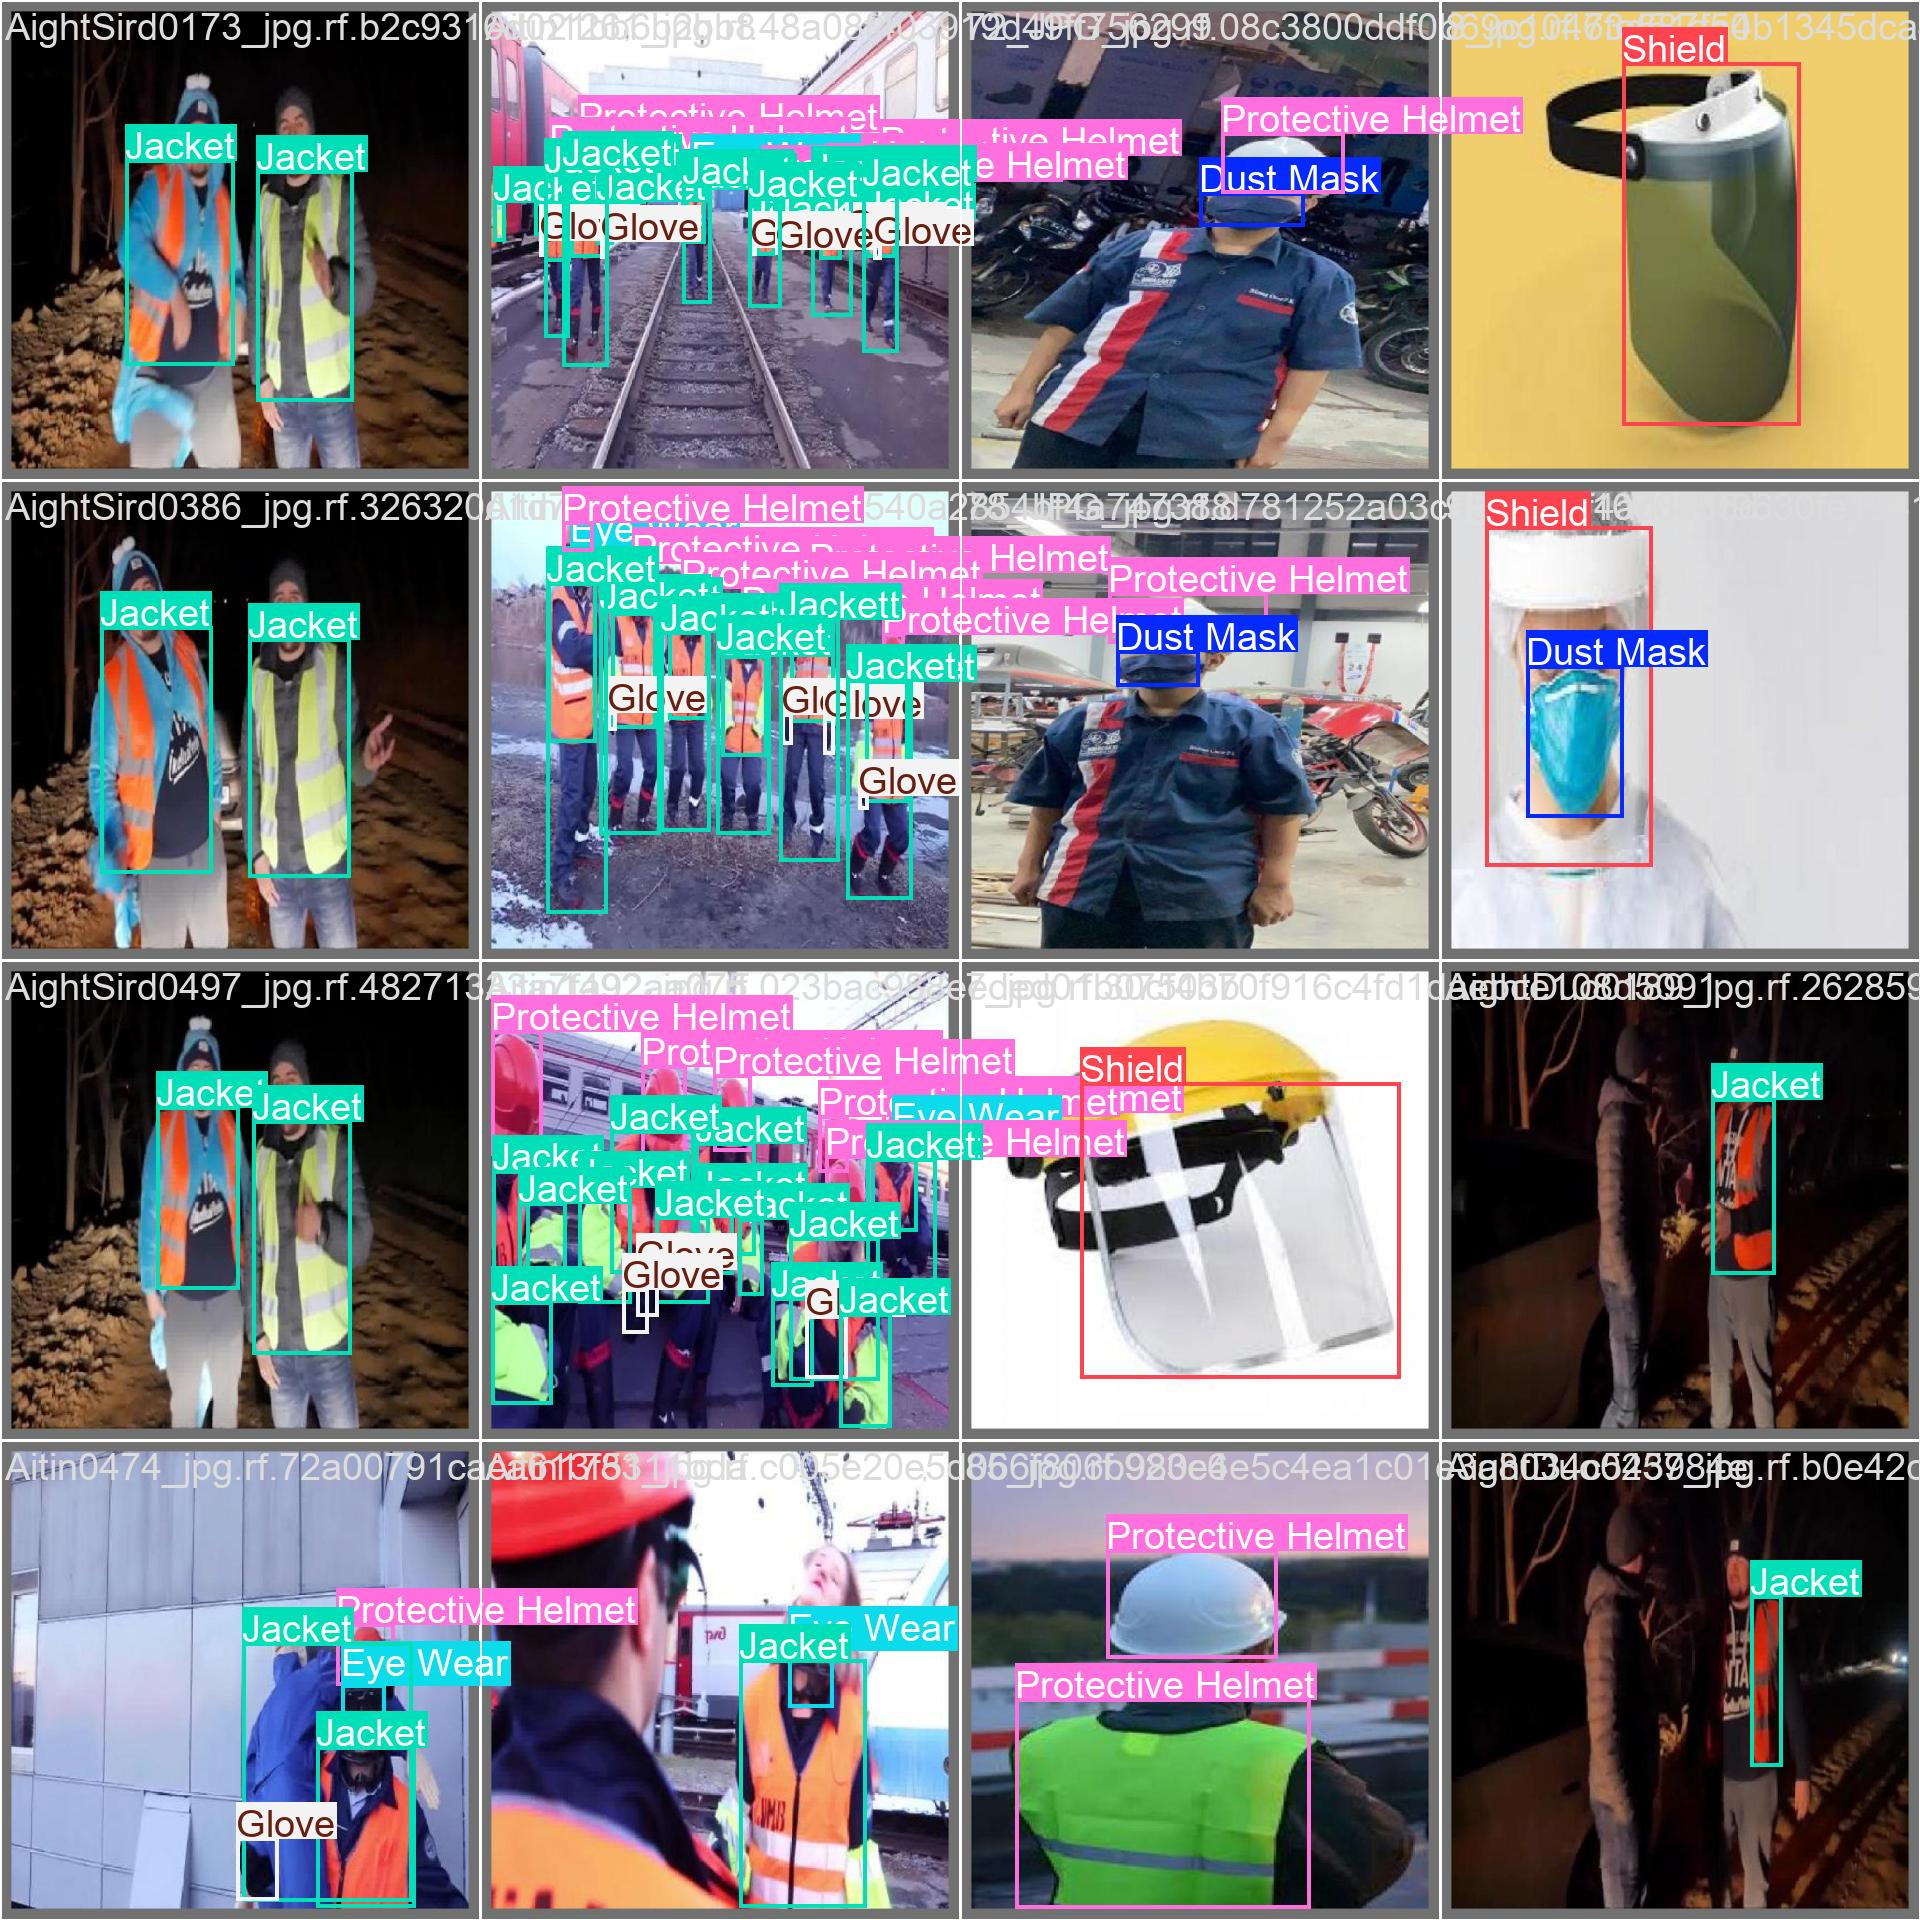

In [14]:
Image("/kaggle/working/runs/detect/train/val_batch1_labels.jpg", width=600)

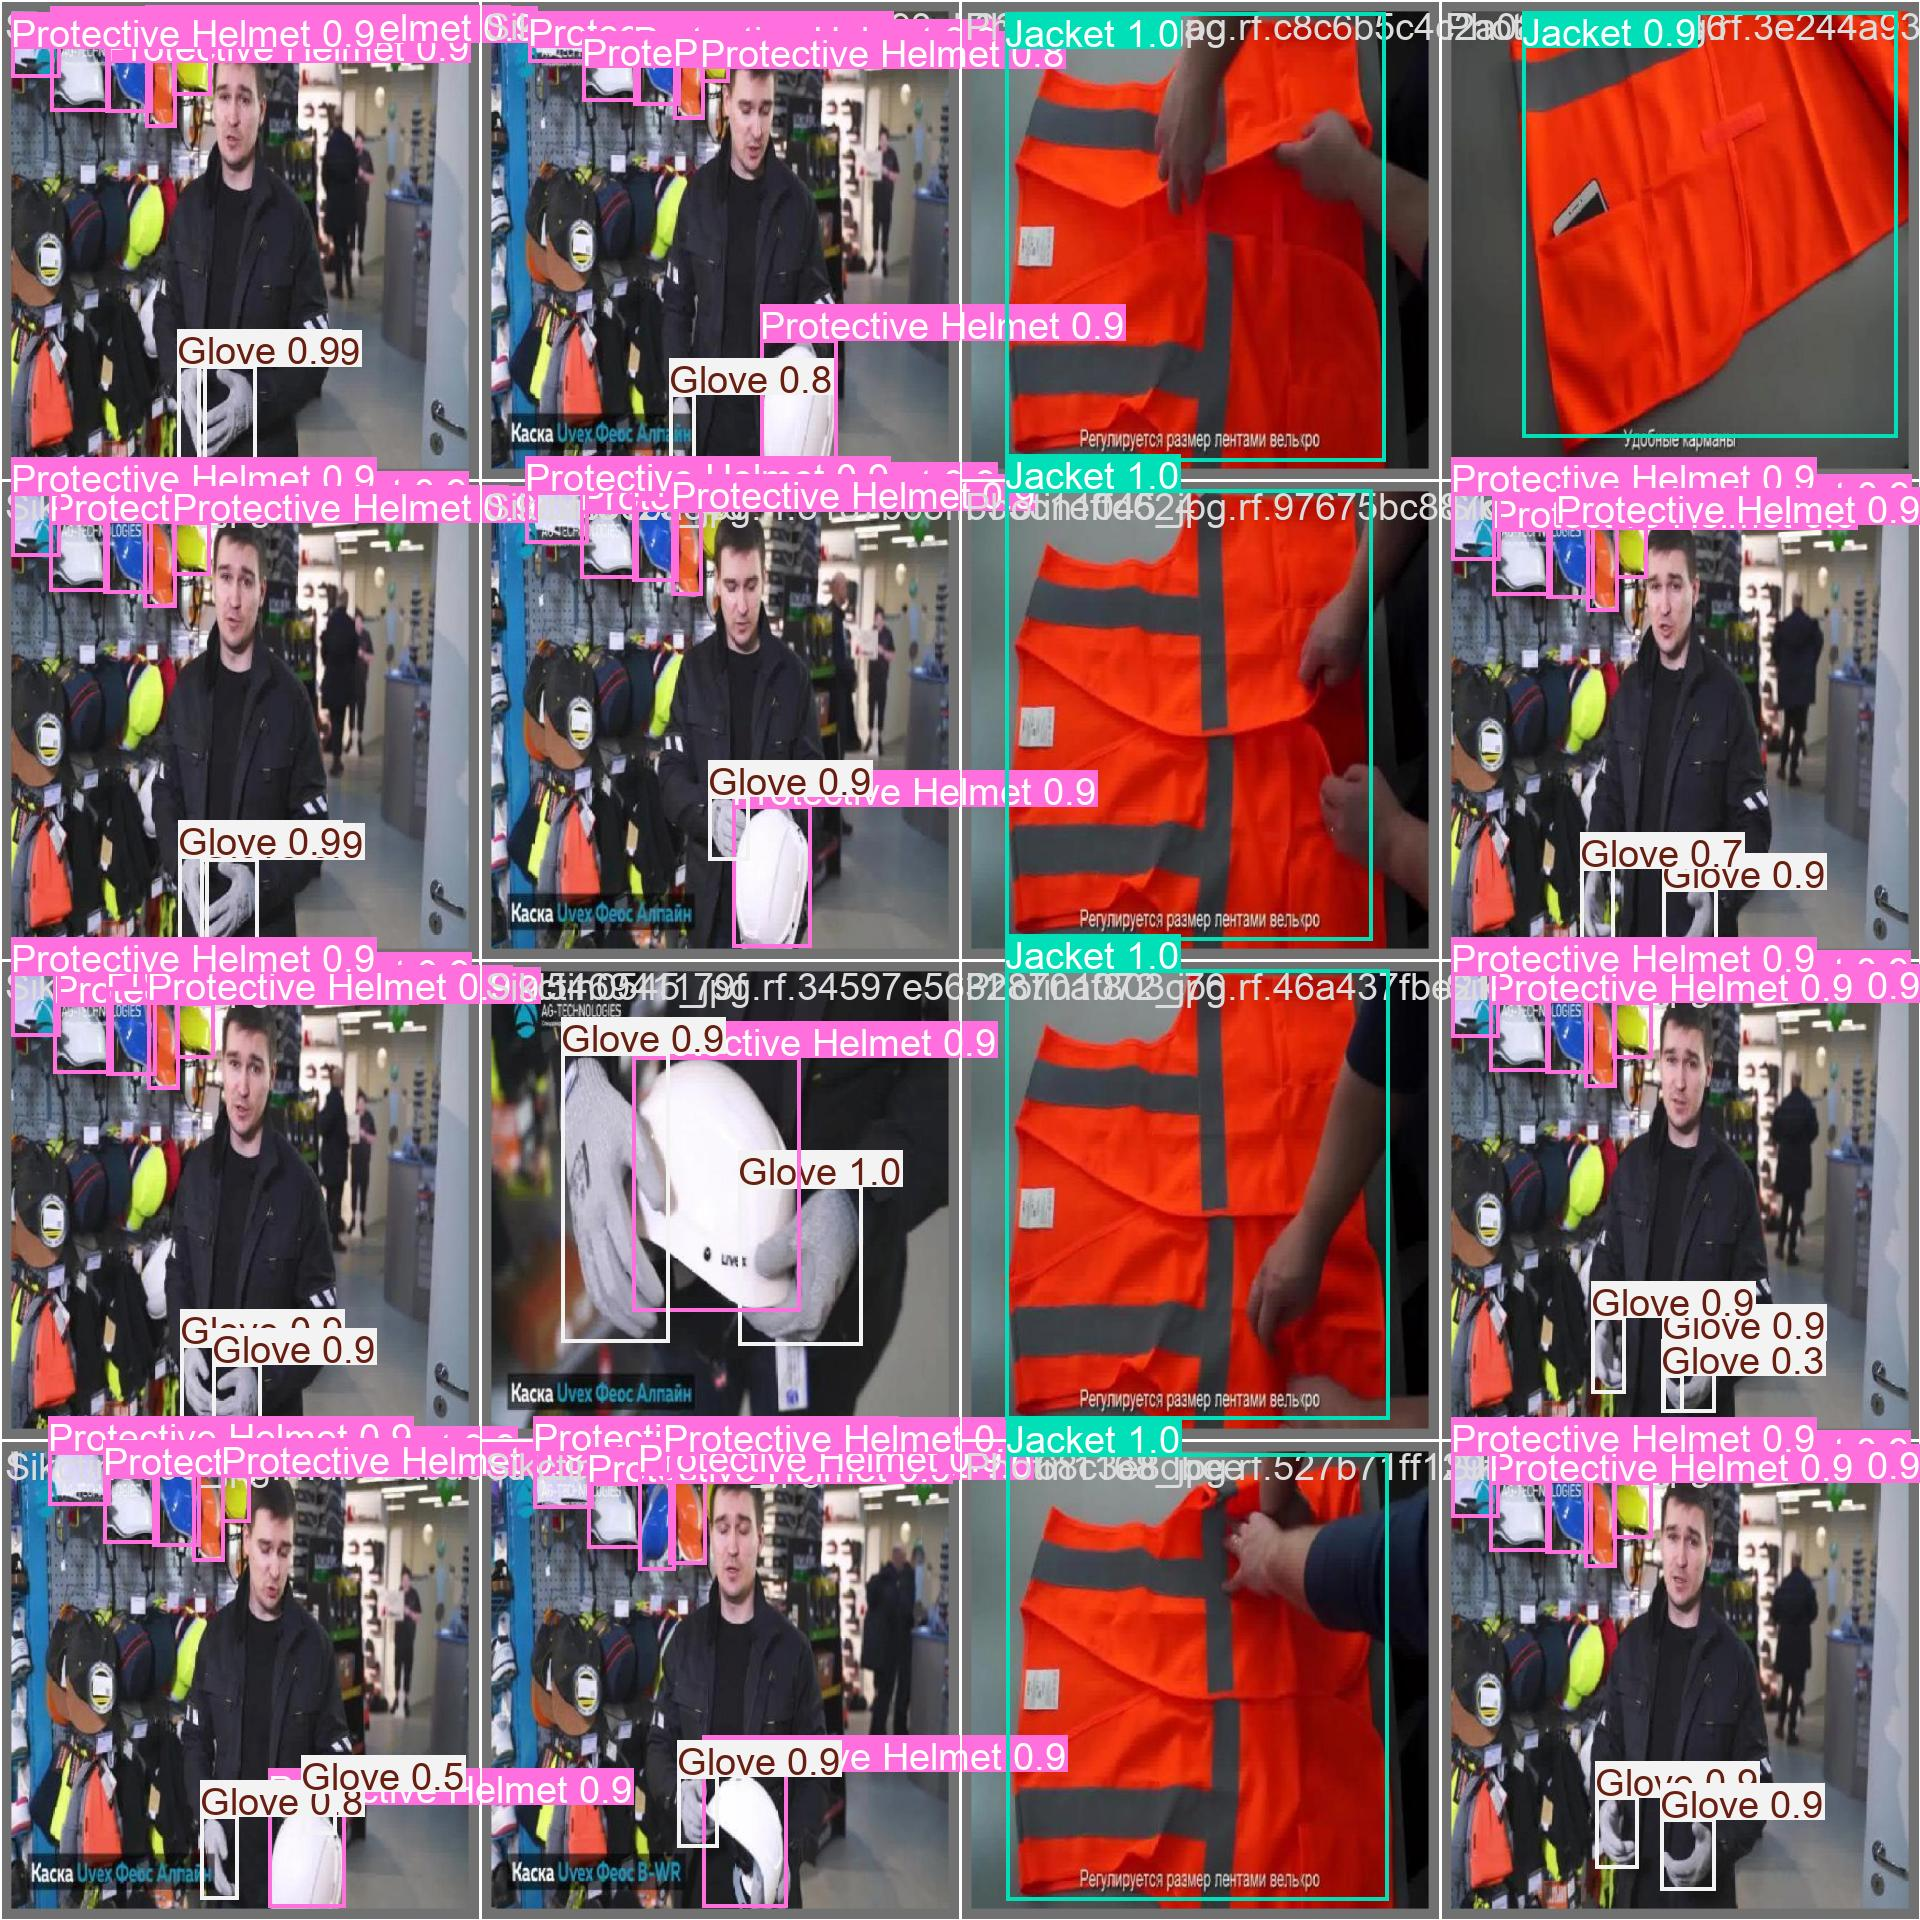

In [15]:
Image("/kaggle/working/runs/detect/train/val_batch2_pred.jpg", width=500)

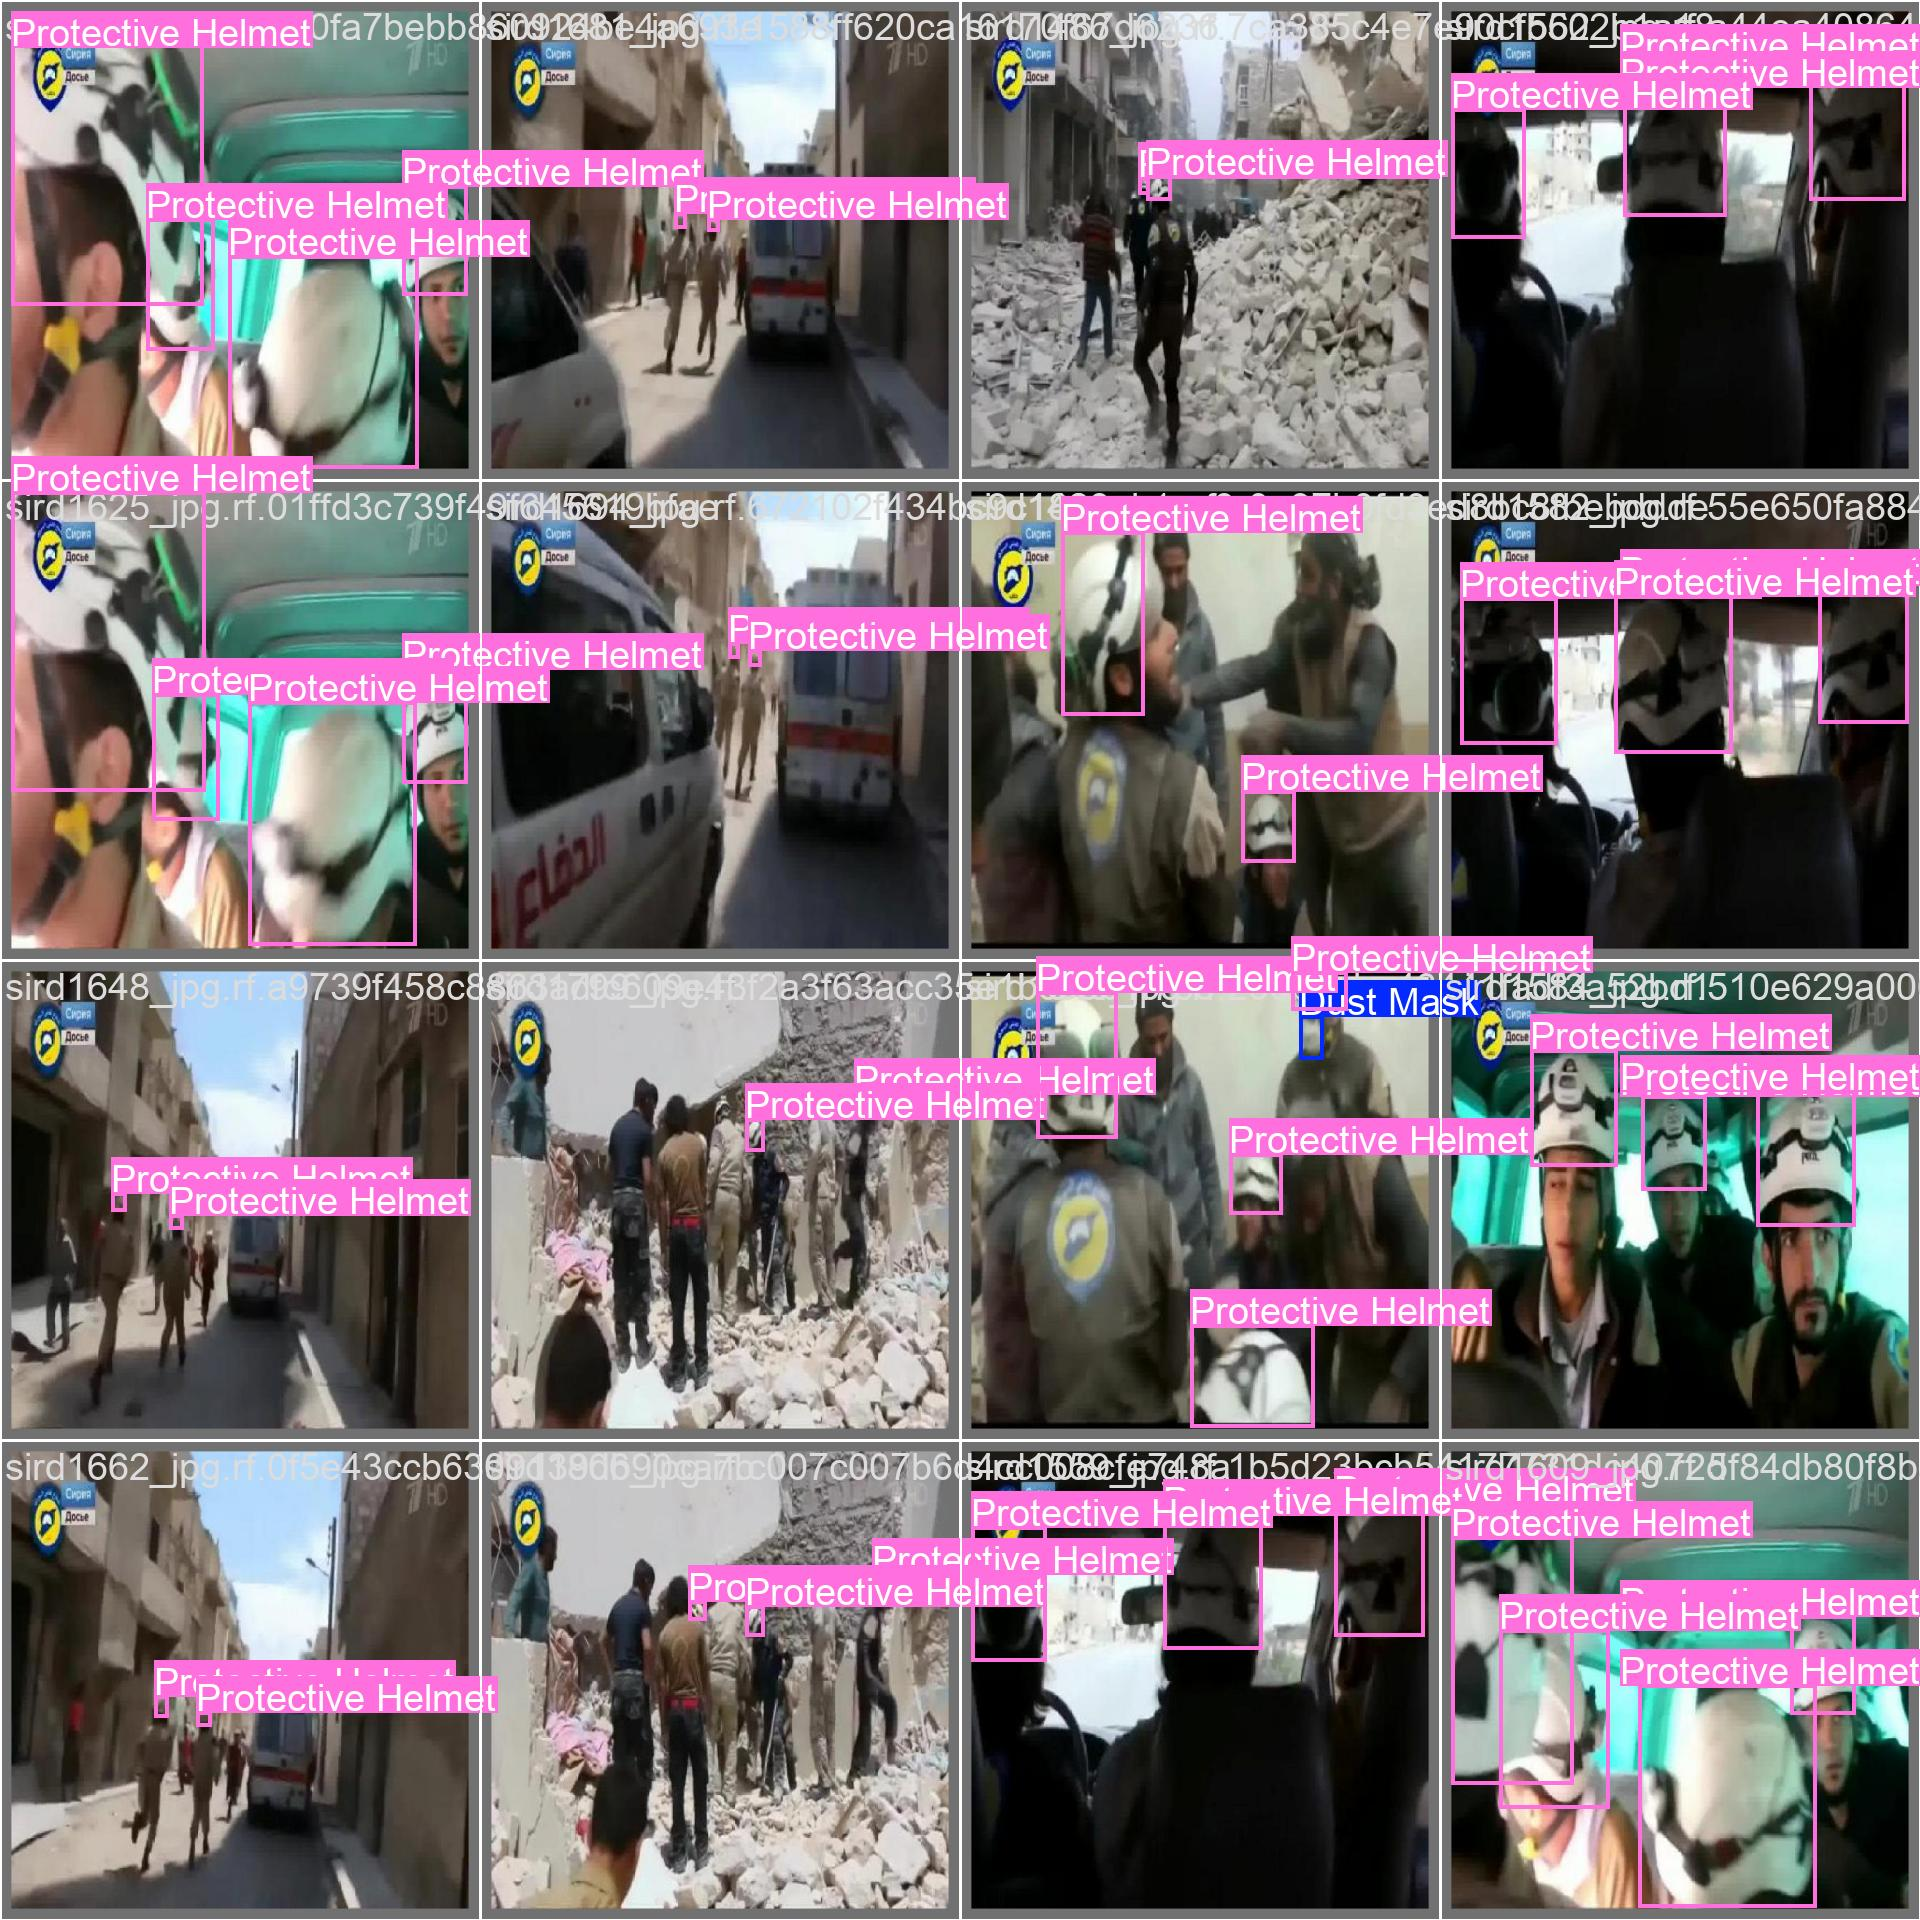

In [17]:
Image("/kaggle/working/runs/detect/train/val_batch0_labels.jpg", width=500)

In [26]:
import pandas as pd 
image_data=pd.read_csv("/kaggle/working/runs/detect/train/results.csv")

In [27]:
image_data

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,42.4868,1.51016,2.95988,1.39798,0.84388,0.43932,0.50734,0.29209,1.43736,1.79767,1.37105,0.000301,0.000301,0.000301
1,2,74.6916,1.40752,1.70365,1.31516,0.75092,0.51958,0.59011,0.34602,1.39347,1.53196,1.36254,0.000592,0.000592,0.000592
2,3,105.9140,1.39426,1.52840,1.31741,0.76890,0.52787,0.58004,0.33191,1.42396,1.52753,1.39113,0.000871,0.000871,0.000871
3,4,137.0360,1.35315,1.40489,1.29361,0.71890,0.64925,0.68313,0.40689,1.31628,1.26700,1.31205,0.000855,0.000855,0.000855
4,5,168.0230,1.32084,1.25305,1.25990,0.74713,0.62573,0.69079,0.41646,1.32085,1.19055,1.29633,0.000837,0.000837,0.000837
5,6,198.7530,1.30298,1.20532,1.25762,0.74103,0.66909,0.71812,0.43702,1.28958,1.10251,1.29272,0.000819,0.000819,0.000819
6,7,229.6730,1.28894,1.13353,1.24451,0.77722,0.65388,0.71729,0.44668,1.25198,1.09374,1.26324,0.000801,0.000801,0.000801
7,8,260.4300,1.26742,1.09380,1.22948,0.86764,0.64326,0.74441,0.45831,1.26394,1.02754,1.27294,0.000783,0.000783,0.000783
8,9,291.6340,1.23181,1.03926,1.20768,0.74954,0.70672,0.74905,0.47025,1.25347,1.02298,1.26572,0.000765,0.000765,0.000765
9,10,322.3210,1.22245,0.98829,1.20616,0.80232,0.71753,0.77246,0.48386,1.22402,0.94203,1.22592,0.000747,0.000747,0.000747


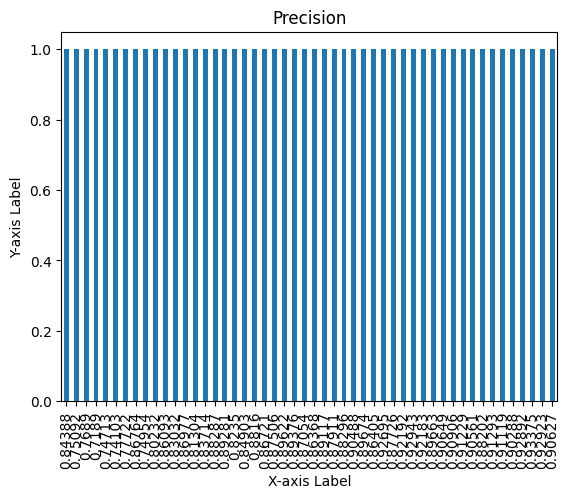

In [28]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Load the CSV file  
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')  

# Create a simple bar chart  
df['metrics/precision(B)'].value_counts().plot(kind='bar')  
plt.title('Precision')  
plt.xlabel('X-axis Label')  
plt.ylabel('Y-axis Label')  
plt.show()

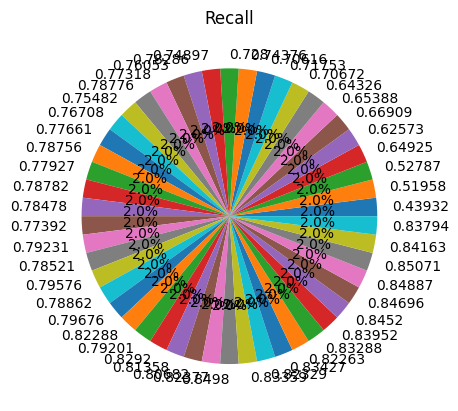

In [41]:
df['metrics/recall(B)'].value_counts().plot(kind='pie', autopct='%1.1f%%')  
plt.title('Recall')  
plt.ylabel('')  # Hide the y-label for a cleaner look  
plt.show()